In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os

from ipynb.fs.full.SeedMaskExtractor import find_seed_width_height_area, get_seed_masked_image
from ipynb.fs.full.SeedFinder import all_seeds

In [17]:
def display_seed(seed, title='seed'):
    plt.imshow(seed, cmap='gray')
    plt.title(title)
    plt.colorbar()
    plt.show()

In [18]:
def find_max_width_height_area_of_seeds(seeds_folder):
    max_width, max_height, max_area = 0, 0, 0
    for path in all_seeds:
        seed = np.load(os.path.join(seeds_folder, path))[:,:,200]
        width, height, _, _, area = find_seed_width_height_area(seed)
        max_width = width if width > max_width else max_width
        max_height = height if height > max_height else max_height
        max_area = area if area > max_area else max_area
    return max_width, max_height, area

In [19]:
max_width, max_height, _ = find_max_width_height_area_of_seeds('../home')
np.save('../normalization_parameters/max_width.npy', max_width)
np.save('../normalization_parameters/max_height.npy', max_height)

In [20]:
def create_resized_image(image, max_width, max_height, data_type):
    height, width, bands = image.shape
    resized_image = np.zeros((max_height + 2, max_width + 2, bands), dtype=data_type)  # +2 is for all the seeds to be surrounded by black
    row_offset, column_offset = (max_height - height)//2 + 1, (max_width - width)//2 + 1
    resized_image[row_offset:row_offset + height, column_offset:column_offset + width, :] = image
    return resized_image

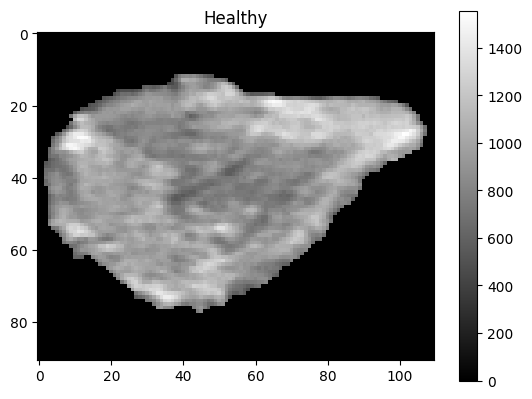

shape before: (76, 114, 840) - shape after: (91, 110, 840)


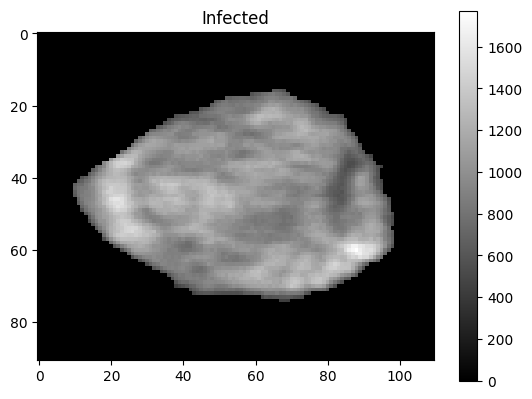

shape before: (69, 98, 840) - shape after: (91, 110, 840)


In [21]:
max_width = np.load('../normalization_parameters/max_width.npy')
max_height = np.load('../normalization_parameters/max_height.npy')
for path in all_seeds[11:13]:
    seed = np.load(os.path.join('../home', path))
    masked_image = get_seed_masked_image(seed, 200)
    resized_image = create_resized_image(masked_image, max_width, max_height, np.int64)
    title = 'Healthy' if 'Healthy' in path else 'Infected'
    display_seed(resized_image[:,:,200], title)
    print('shape before:', seed.shape, '- shape after:', resized_image.shape)